# Forma basica de uso de MatplotLib

## Estructura Básica de un Gráfico Matplotlib

Un gráfico en matplotlib se compone de 4 partes principales:

### 1. **Figura (Figure)** - El lienzo completo
```python
import matplotlib.pyplot as plt

# Crear la figura (el lienzo donde dibujamos)
fig = plt.figure(figsize=(10, 6))  # 10 pulgadas de ancho, 6 de alto
```

### 2. **Ejes (Axes)** - El área donde se dibuja el gráfico
```python
# Crear los ejes dentro de la figura
ax = fig.add_subplot(111)  # 1 fila, 1 columna, primer gráfico
# o más simple:
ax = plt.subplot()         # manera simplificada
```

### 3. **Datos (Data)** - La información a visualizar
```python
# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Dibujar los datos en los ejes
ax.plot(x, y, label='Línea ejemplo', color='blue', marker='o')
```

### 4. **Elementos Decorativos** - Lo que hace legible el gráfico
```python
# Personalizar el gráfico
ax.set_title('Mi Primer Gráfico')      # Título
ax.set_xlabel('Eje X')                 # Etiqueta eje X
ax.set_ylabel('Eje Y')                 # Etiqueta eje Y
ax.legend()                            # Leyenda
ax.grid(True)                          # Cuadrícula
```

##  Analogía para Entender

Piensa en matplotlib como **dibujar en un cuaderno**:

1. **📒 Figure** = La hoja de papel completa
2. **📏 Axes** = El recuadro donde dibujas
3. **📊 Plot** = El dibujo/líneas/gráfico
4. **✏️ Labels** = Los títulos y etiquetas
5. **🎨 Style** = Los colores y estilos

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url_path = './storage/pune_1965_2002.csv'
df = pd.read_csv(url_path)

In [ ]:
df.head()

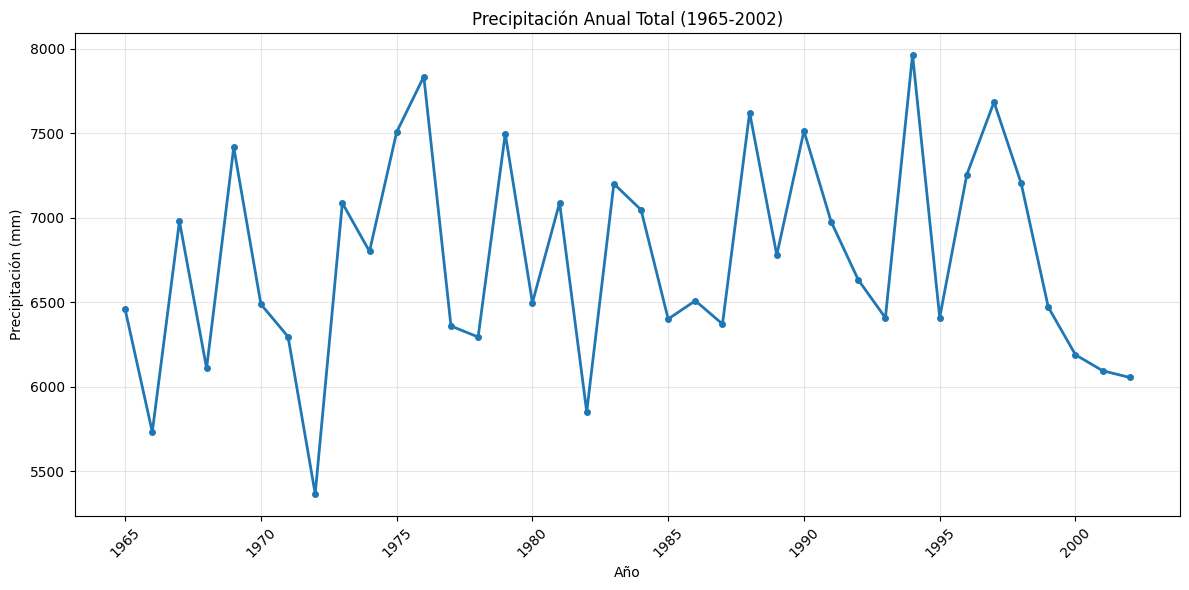

In [10]:
# Calcular precipitación anual sumando todos los meses
df['Annual'] = df.sum(axis=1, numeric_only=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Annual'], marker='o', linewidth=2, markersize=4)
plt.title('Precipitación Anual Total (1965-2002)')
plt.xlabel('Año')
plt.ylabel('Precipitación (mm)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

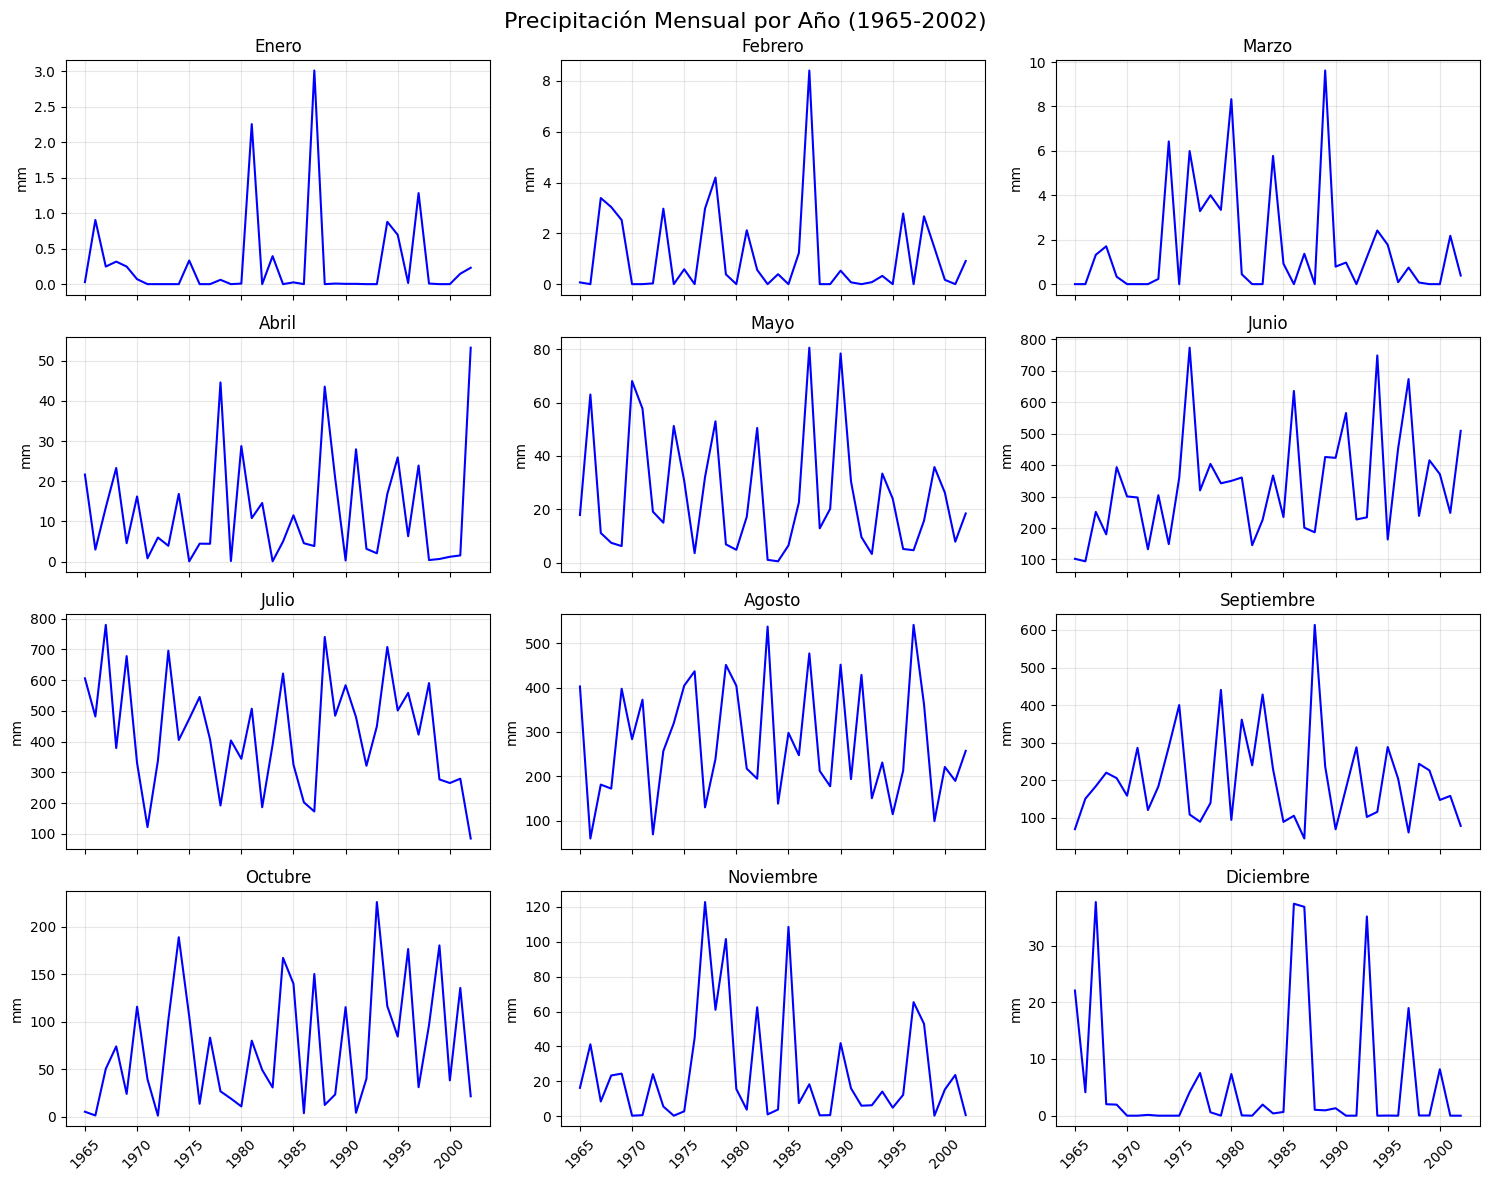

In [15]:
# Versión más simple para alumnos
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

meses_esp = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
             'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

for i, (ax, mes_eng, mes_esp) in enumerate(zip(axes.flat, meses, meses_esp)):
    ax.plot(df['Year'], df[mes_eng], color='blue')
    ax.set_title(mes_esp)
    ax.set_ylabel('mm')
    ax.grid(True, alpha=0.3)
    
    # Rotar labels solo en los ejes de abajo
    if i >= 9:
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.set_xticklabels([])  # Ocultar labels en ejes superiores

plt.suptitle('Precipitación Mensual por Año (1965-2002)', fontsize=16)
plt.tight_layout()
plt.show()

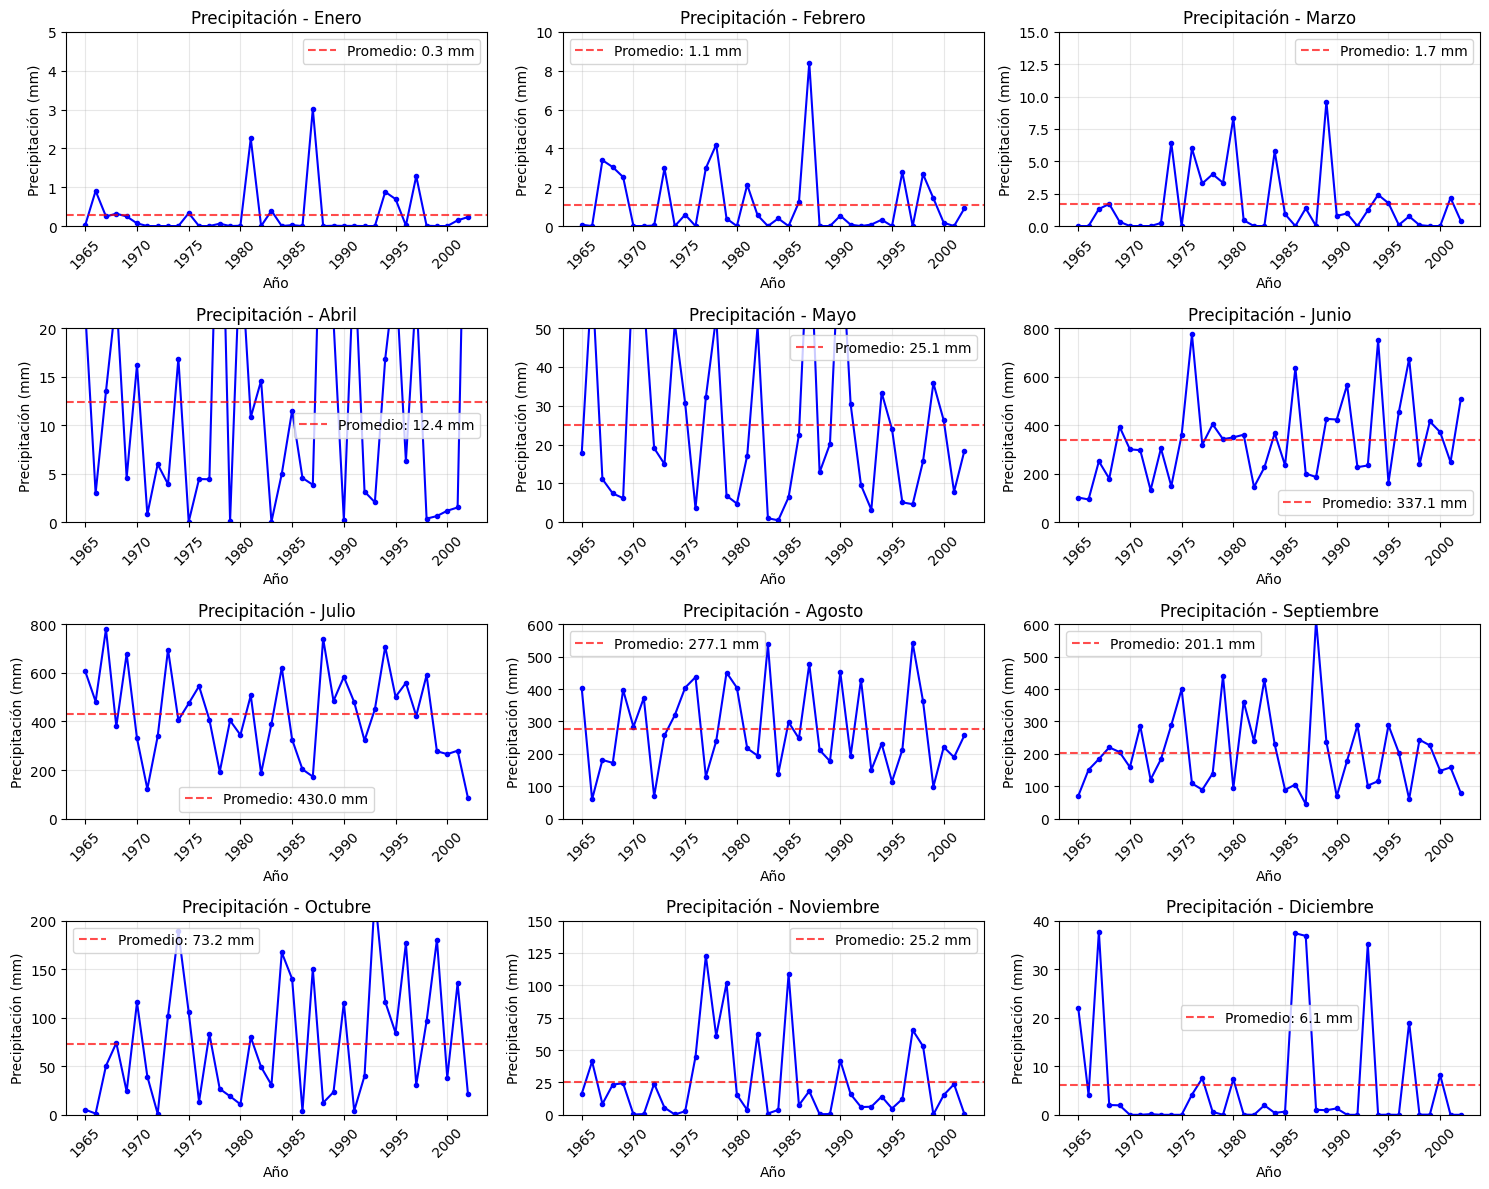

In [14]:
# Crear figura con subgráficos para cada mes
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()  # Convertir a array 1D

meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Definir límites personalizados por mes
limites_meses = {
    'Jan': 5, 'Feb': 10, 'Mar': 15, 'Apr': 20, 'May': 50, 'Jun': 800,
    'Jul': 800, 'Aug': 600, 'Sep': 600, 'Oct': 200, 'Nov': 150, 'Dec': 40
}

for i, mes in enumerate(meses):
    ax = axes[i]
    
    # Graficar datos del mes
    ax.plot(df['Year'], df[mes], marker='o', linewidth=1.5, markersize=3, color='blue')
    
    # Establecer límites del eje Y
    ax.set_ylim(0, limites_meses[mes])
    
    # Personalizar
    ax.set_title(f'Precipitación - {nombres_meses[i]}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Precipitación (mm)')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Añadir línea de promedio
    promedio = df[mes].mean()
    ax.axhline(y=promedio, color='red', linestyle='--', alpha=0.7, 
               label=f'Promedio: {promedio:.1f} mm')
    ax.legend()

plt.tight_layout()
plt.show()